## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

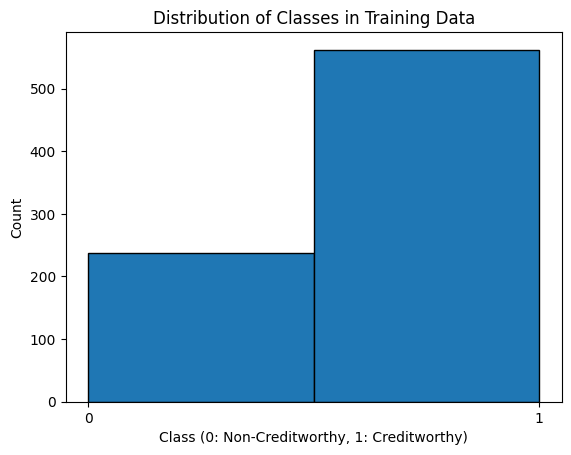

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [32]:


ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=191, random_state=42, max_depth=829, min_samples_leaf=3, max_leaf_nodes=72, min_samples_split=8)#md - 6 # {'max_depth': 50, 'n_estimators': 100}


parameters = {'max_depth': range(50,100), 'n_estimators': range(100, 110)}#'min_weight_fraction_leaf': range(0.0 , 0.35 , 0.05), , 'min_impurity_decrease': range(0.0 , 0.35 , 0.01), 'n_estimators': range(50, 100),  'max_leaf_nodes': range(6, 100), , 'min_samples_split': range(2, 200), 'min_samples_leaf': range(1, 200)
#829

#rf_model= GridSearchCV(rf_model, parameters, cv=5, scoring='roc_auc')
rf_model.fit(X_resampled, y_resampled)   



class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# Создание модели с взвешиванием классов
#model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)), n_estimators=100)

#ensemble = [RandomForestClassifier(n_estimators=191, random_state=42, max_depth=829, min_samples_leaf=3, max_leaf_nodes=72, min_samples_split=8 ) for _ in range(10)]#class_weight=dict(enumerate(class_weights)),n_estimators=100, max_depth=50
#for model in ensemble:
    #sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    #X_subset, y_subset = X_resampled[sample_indices], y_resampled[sample_indices]
    #model.fit(X_subset, y_subset)
#predictions = np.array([model.predict(X_test) for model in ensemble])

#ensemble_predictions = np.mean(predictions.T, axis=1)
#ensemble_predictions=np.round(ensemble_predictions.reshape(200,1))



# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

#erf_roc_auc = roc_auc_score(y_test, ensemble_predictions)
#erf_accuracy = accuracy_score(y_test, ensemble_predictions)
#erf_precision = precision_score(y_test, ensemble_predictions)
#erf_recall = recall_score(y_test, ensemble_predictions)

#print("eRandom Forest метрики:")
#print(f"ROC AUC: {erf_roc_auc:.2f}")
#print(f"Accuracy: {erf_accuracy:.2f}")
#print(f"Precision: {erf_precision:.2f}")
#print(f"Recall: {erf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=990, random_state=42)

parameters = {'min_samples_split': range(4,10), 'min_samples_leaf': range(1,11)} #'learning_rate': range(0 , 0.35 , 0.05), , 'min_samples_split': range(4,100), 'min_samples_leaf': range(1,50) 'n_estimators': range(100,1000)
gb_model = GridSearchCV(gb_model, parameters, cv=10, scoring='roc_auc')
gb_model.fit(X_resampled, y_resampled)
#print(gb_model.best_params_)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.72
Accuracy: 0.76
Precision: 0.83
Recall: 0.82


KeyboardInterrupt: 

In [5]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
# parameters = {'hidden_layer_sizes': (range(30, 35),), 'max_iter': range(180,210), 'solver':['lbfgs', 'sgd', 'adam']}
# mlp_model = RandomizedSearchCV(mlp_model, parameters, cv=5, scoring='roc_auc')
# mlp_model.fit(X_resampled, y_resampled)

ensemble1 = [MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42) for _ in range(100)]#class_weight=dict(enumerate(class_weights)),n_estimators=100, max_depth=50
ensamble2 = [RandomForestClassifier(n_estimators=191, random_state=42, max_depth=829, min_samples_leaf=3, max_leaf_nodes=72, min_samples_split=8) for _ in range(100)]
ensamble3 = [GradientBoostingClassifier(n_estimators=990, random_state=42) for _ in range(100)] 
bg_e=[]
for model1, model2, model3 in zip(ensemble1, ensamble2, ensamble3):
    sample_indices = np.random.choice(len(X_resampled), size=len(X_resampled), replace=True)
    X_subset, y_subset = X_resampled[sample_indices], y_resampled[sample_indices]
    bg1 = BaggingClassifier(model1, max_samples=0.4, max_features=10)
    bg2 = BaggingClassifier(model1, max_samples=0.4, max_features=10)
    bg3 = BaggingClassifier(model1, max_samples=0.4, max_features=10)
    bg1.fit(X_subset, y_subset)
    bg2.fit(X_subset, y_subset)
    bg3.fit(X_subset, y_subset)
    bg = np.mean((bg1.predict(X_test) + bg2.predict(X_test) + bg3.predict(X_test))/3)
    bg_e.append(bg)
bgo= np.mean(bg_e, axis=0)
    
    
    
# predictions1 = pd.DataFrame([model.predict(X_test) for model in ensemble1])
# predictions2 = pd.DataFrame([model.predict(X_test) for model in ensemble1])
# predictions3 = pd.DataFrame([model.predict(X_test) for model in ensemble1])

# ensemble_predictions = predictions.rank(axis=1, method="first")
# ensemble_predictions1 = np.round(np.mean(predictions1.to_numpy(), axis=0)).T
# ensemble_predictions2 = np.round(np.mean(predictions2.to_numpy(), axis=0)).T
# ensemble_predictions3 = np.round(np.mean(predictions3.to_numpy(), axis=0)).T
# end = np.round((ensemble_predictions1 + ensemble_predictions2 + ensemble_predictions3)/3).T

# print(end)
# ensemble_predictions=np.round(ensemble_predictions.reshape(200,1))

# Прогноз на тестовых данных
# mlp_pred = mlp_model.best_estimator_.predict(X_test)

# Расчет метрик для MLP нейронной сети
# mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
# mlp_accuracy = accuracy_score(y_test, mlp_pred)
# mlp_precision = precision_score(y_test, mlp_pred)
# mlp_recall = recall_score(y_test, mlp_pred)

mlp_roc_auc = roc_auc_score(y_test, bgo)
mlp_accuracy = accuracy_score(y_test, bgo)
mlp_precision = precision_score(y_test, bgo)
mlp_recall = recall_score(y_test, end)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")

d:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum 

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели